# The miniJPAS survey: star-galaxy classification using machine learning


Codes for graphics used in the paper “The miniJPAS survey: star-galaxy classification using machine learning” (P. O. Baqui, V. Marra et al.) https://arxiv.org/abs/2007.07622

In this code we calculated the Galaxy and Star purity for different magnitudes in rSDSS band for XMatch catalog

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
# read data from SDSS
df_sdss = pd.read_csv('/home/pedro/Desktop/after_referee/fusion/colored/dataset/sdss.csv')
df_sdss = df_sdss[((df_sdss['rSDSS'] >=15) & (df_sdss['rSDSS'] < 18.5))][df_sdss['FLAGS']==0][df_sdss['MASK_FLAGS']==0]


df_sdss = df_sdss[df_sdss['class_SDSS'].notna()]
count1 = df_sdss['class_SDSS'].isna().sum()

/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# read data from HSC-SUBARU

df_hsc = pd.read_csv('/home/pedro/Desktop/after_referee/fusion/colored/dataset/cross_match_hsc.csv')
df_hsc = df_hsc[((df_hsc['rSDSS'] >= 18.5) & (df_hsc['rSDSS'] <= 23.5))][df_hsc['FLAGS']==0][df_hsc['MASK_FLAGS']==0][df_hsc['r_extendedness_flag']!=1]

df_hsc = df_hsc[df_hsc['r_extendedness_value'].notna()]
count2 = df_hsc['r_extendedness_value'].isna().sum()

In [4]:
# removing missing values in target

df_sdss = df_sdss[df_sdss['class_SDSS'].notna()]
df_hsc = df_hsc[df_hsc['r_extendedness_value'].notna()]


# changing probabilities: 1 = galaxy and 0 = stars

df_sdss['pdf'] = 1-df_sdss['pdf']
df_hsc['pdf'] = 1-df_hsc['pdf']
df_hsc['class_Sextractor'] = 1-df_hsc['class_Sextractor']
df_sdss['class_Sextractor'] = 1-df_sdss['class_Sextractor']


# cheking
count1 = df_sdss['class_SDSS'].isna().sum()
#print(count1)

count2 = df_hsc['r_extendedness_value'].isna().sum()
#print(count2)

In [5]:
# changing labels: 1 = galaxy and 0 = stars

df_sdss['class_SDSS'] = df_sdss['class_SDSS'].apply(lambda x: 0 if x == 6 else 1) 
df_hsc['r_extendedness_value'] = df_hsc['r_extendedness_value'].apply(lambda x: 0 if x == 0.0 else 1)

In [6]:
# Join catalogue

header = {"label", "pdf", "uJAVA","J0378","J0390","J0400","J0410","J0420","J0430","J0440","J0450","J0460","J0470","J0480","J0490","J0500","J0510","J0520","J0530","J0540","J0550","J0560","J0570","J0580","J0590","J0600","J0610","J0620","J0630","J0640","J0650","J0660","J0670","J0680","J0690","J0700","J0710","J0720","J0730","J0740","J0750","J0760","J0770","J0780","J0790","J0800","J0810","J0820","J0830","J0840","J0850","J0860","J0870","J0880","J0890","J0900","J0910","J1007","uJPAS","gSDSS","rSDSS","iSDSS","c_r","mu_max_mag_apertu","fwhm","alb"}

df_sdss = df_sdss[["class_Sextractor","class_SDSS", "pdf","TILE_ID","uJAVA","J0378","J0390","J0400","J0410","J0420","J0430","J0440","J0450","J0460","J0470","J0480","J0490","J0500","J0510","J0520","J0530","J0540","J0550","J0560","J0570","J0580","J0590","J0600","J0610","J0620","J0630","J0640","J0650","J0660","J0670","J0680","J0690","J0700","J0710","J0720","J0730","J0740","J0750","J0760","J0770","J0780","J0790","J0800","J0810","J0820","J0830","J0840","J0850","J0860","J0870","J0880","J0890","J0900","J0910","J1007","uJPAS","gSDSS","rSDSS","iSDSS","uJAVAerr","J0378err","J0390err","J0400err","J0410err","J0420err","J0430err","J0440err","J0450err","J0460err","J0470err","J0480err","J0490err","J0500err","J0510err","J0520err","J0530err","J0540err","J0550err","J0560err","J0570err","J0580err","J0590err","J0600err","J0610err","J0620err","J0630err","J0640err","J0650err","J0660err","J0670err","J0680err","J0690err","J0700err","J0710err","J0720err","J0730err","J0740err","J0750err","J0760err","J0770err","J0780err","J0790err","J0800err","J0810err","J0820err","J0830err","J0840err","J0850err","J0860err","J0870err","J0880err","J0890err","J0900err","J0910err","J1007err","uJPASerr","gSDSSerr","rSDSSerr","iSDSSerr","c_r","mu_max_mag_apertu","fwhm","alb"]].copy()
df_hsc = df_hsc[["class_Sextractor","r_extendedness_value", "pdf","TILE_ID","uJAVA","J0378","J0390","J0400","J0410","J0420","J0430","J0440","J0450","J0460","J0470","J0480","J0490","J0500","J0510","J0520","J0530","J0540","J0550","J0560","J0570","J0580","J0590","J0600","J0610","J0620","J0630","J0640","J0650","J0660","J0670","J0680","J0690","J0700","J0710","J0720","J0730","J0740","J0750","J0760","J0770","J0780","J0790","J0800","J0810","J0820","J0830","J0840","J0850","J0860","J0870","J0880","J0890","J0900","J0910","J1007","uJPAS","gSDSS","rSDSS","iSDSS","uJAVAerr","J0378err","J0390err","J0400err","J0410err","J0420err","J0430err","J0440err","J0450err","J0460err","J0470err","J0480err","J0490err","J0500err","J0510err","J0520err","J0530err","J0540err","J0550err","J0560err","J0570err","J0580err","J0590err","J0600err","J0610err","J0620err","J0630err","J0640err","J0650err","J0660err","J0670err","J0680err","J0690err","J0700err","J0710err","J0720err","J0730err","J0740err","J0750err","J0760err","J0770err","J0780err","J0790err","J0800err","J0810err","J0820err","J0830err","J0840err","J0850err","J0860err","J0870err","J0880err","J0890err","J0900err","J0910err","J1007err","uJPASerr","gSDSSerr","rSDSSerr","iSDSSerr","c_r","mu_max_mag_apertu","fwhm","alb"]].copy()


df_sdss = df_sdss.rename(columns={"class_SDSS": "label"})
df_hsc  = df_hsc.rename(columns={"r_extendedness_value": "label"})


frames = [df_sdss, df_hsc]
df= pd.concat(frames)

In [7]:
# Tiles

#AEGIS001 - 0.70"
#AEGIS002 - 0.81"
#AEGIS003 - 0.68"
#AEGIS004 - 0.82"

df['TILE_ID'] = df['TILE_ID'].map({2241: 0.70, 2243:0.81, 2406:0.68, 2470:0.82})
print(df.shape)

(11763, 128)


In [8]:
# Separing features and targets

y_all = df[['class_Sextractor','label','pdf']]
x = df.iloc[:,3:] 

print(df.shape)
print('galaxies: %d' % (y_all['label'] == 1).sum())
print('star: %d' % (y_all['label'] == 0).sum())

(11763, 128)
galaxies: 9517
star: 2246


In [9]:
# data separation in training and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y_all, test_size=0.2, random_state=5)

In [10]:
# data standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
# load weights from model

loaded_ert_morpho = pickle.load(open('weigth_ert_morpho.sav', 'rb'))
ert_test_morpho = loaded_ert_morpho.predict_proba(x_test_std)[:,1] # Probability to be galaxy


loaded_rf_photo = pickle.load(open('weigth_rf_photo.sav', 'rb'))
rf_test_photo = loaded_rf_photo.predict_proba(x_test_std[:,:-4])[:,1] 


loaded_rf_morpho = pickle.load(open('weigth_rf_morpho.sav', 'rb'))
rf_test_morpho = loaded_rf_morpho.predict_proba(x_test_std)[:,1] 


loaded_nn_morpho = pickle.load(open('weigth_nn_morpho.sav', 'rb'))
nn_test_morpho = loaded_nn_morpho.predict_proba(x_test_std)[:,1] 


probas = np.asarray([rf_test_morpho, nn_test_morpho, y_test['pdf']])
el_test = np.average(probas, axis=0, weights=None)

In [12]:
hist_bins = [20,20.5,21,21.5,22,22.5,23,23.5]
# hist_bins = bins(8)
# print(hist_bins)

mag_r_test = x_test['rSDSS']

 This part of code is based at  https://arxiv.org/pdf/1505.02200.pdf available in https://github.com/edwardjkim/astroclass 


In [13]:

def calc_completeness_purity(truth, classif, mag, p_cut=0.001, bins=None):
   
    
    #bins = bins[1:]
    result = {}
    
    g_comp_bin = np.zeros(len(bins))
    g_pur_bin = np.zeros(len(bins))
    s_comp_bin = np.zeros(len(bins))    
    s_pur_bin = np.zeros(len(bins))
    
    g_pur_lower_bin = np.zeros(len(bins))
    g_pur_upper_bin = np.zeros(len(bins))

    s_pur_upper_bin = np.zeros(len(bins))
    s_pur_lower_bin = np.zeros(len(bins))

    for i, b in enumerate(bins):
                
        # true galaxies classified as stars
        mask = (mag > -90) & (mag < b)
        gs_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
        # true galaxies classified as galaxies
        gg_bin = ((classif[mask] < p_cut) & (truth[mask] == 0)).sum().astype(np.float)
        # true stars classified as galaxies
        sg_bin = ((classif[mask] < p_cut) & (truth[mask] == 1)).sum().astype(np.float)
        # true stars classified as stars
        ss_bin = ((classif[mask] >= p_cut) & (truth[mask] == 1)).sum().astype(np.float)

        # galaxy completeness
        g_comp_bin[i] = gg_bin / (gg_bin + gs_bin)    
        # galaxy purity
        g_pur_bin[i] = gg_bin / (gg_bin + sg_bin)
        
        # star completeness
        s_comp_bin[i] = ss_bin / (ss_bin + sg_bin)

        s_pur_bin[i] = ss_bin / (ss_bin + gs_bin)
        
        print("Calculating completenss for {0}...".format(b))

        #g_pur_err = calceff(gg_bin + sg_bin, gg_bin)
        #g_pur_lower_bin[i] = g_pur_err[0]
        #g_pur_upper_bin[i] = g_pur_err[1]
        
        #print("Calculating purity for {0}...".format(b))

        #s_pur_err = calceff(ss_bin + gs_bin, ss_bin)
        #s_pur_lower_bin[i] = s_pur_err[0]
        #s_pur_upper_bin[i] = s_pur_err[1]


    result['galaxy_completeness'] = g_comp_bin
    result['galaxy_purity'] = g_pur_bin
    
    result['galaxy_purity_lower'] = g_pur_lower_bin
    result['galaxy_purity_upper'] = g_pur_upper_bin

    result['star_completeness'] = s_comp_bin
    result['star_purity'] = s_pur_bin
    
    result['star_purity_lower'] = s_pur_lower_bin
    result['star_purity_upper'] = s_pur_upper_bin
    
    return result


    
"""def find_purity_at(truth_test, clf, step=0.001, gc=None, gp=None, sc=None, sp=None):
    
    print("Finding the threshold value...")
    
    if bool(gc) and bool(sc) and bool(gp) and bool(sp):
        raise Exception('Specify only one of gp or sp parameter.')

    pbin = np.arange(0, 1, step)
    
    pure_all = np.zeros(len(pbin))
    comp_all = np.zeros(len(pbin))
    
    for i, p in enumerate(pbin):
        
        # true galaxies classified as stars
        gs = ((clf >= p) & (truth_test == 0)).sum()
        # true galaxies classified as galaxies
        gg = ((clf < p) & (truth_test == 0)).sum()
        # true stars classified as galaxies
        sg = ((clf < p) & (truth_test == 1)).sum()
        # true stars classified as stars
        ss = ((clf >= p) & (truth_test == 1)).sum()
    
        if gc is not None or gp is not None:
            if gg == 0 and sg == 0:
                pure_all[i] = np.nan
            else:
                pure_all[i] = gg / (gg + sg)
            if gg == 0 and gs == 0:
                comp_all[i] = np.nan
            else:
                comp_all[i] = gg / (gg + gs)
            
        if sc is not None or sp is not None:
            if ss == 0 and sg == 0:
                comp_all[i] = np.nan
            else:
                comp_all[i] = ss / (ss + sg)
            if ss == 0 and gs == 0:
                pure_all[i] = np.nan
            else:
                pure_all[i] = ss / (ss + gs)
    
    if gc is not None:
        ibin = np.argmin(np.abs(comp_all - gc))
        return pbin[ibin], pure_all[ibin]
    
    if gp is not None:
        ibin = np.argmin(np.abs(pure_all - gp))
        return pbin[ibin], comp_all[ibin]
    
    if sc is not None:
        ibin = np.argmin(np.abs(comp_all - sc))
        return pbin[ibin], pure_all[ibin]
    
    if sp is not None:
        ibin = np.argmin(np.abs(pure_all - sp))
        return pbin[ibin], comp_all[ibin]



pdf_p_cut, _ = find_purity_at(1-y_test['label'], 1-y_test['pdf'], gc=0.99, step=0.0001)
ert_p_cut, _ = find_purity_at(1-y_test['label'], 1-ert_test_morpho, gc=0.99, step=0.0001)
rf_p_cut, _ = find_purity_at(1-y_test['label'], 1-rf_test_photo, gc=0.99, step=0.0001)


print(pdf_p_cut)
print(ert_p_cut)
print(rf_p_cut)"""


# Galaxy Completeness to 99%

# 0.8801
# 0.4801
# 0.5732


# Galaxy Completeness to 95%

# 0.29500000000000004
# 0.1671
# 0.3568

'def find_purity_at(truth_test, clf, step=0.001, gc=None, gp=None, sc=None, sp=None):\n    \n    print("Finding the threshold value...")\n    \n    if bool(gc) and bool(sc) and bool(gp) and bool(sp):\n        raise Exception(\'Specify only one of gp or sp parameter.\')\n\n    pbin = np.arange(0, 1, step)\n    \n    pure_all = np.zeros(len(pbin))\n    comp_all = np.zeros(len(pbin))\n    \n    for i, p in enumerate(pbin):\n        \n        # true galaxies classified as stars\n        gs = ((clf >= p) & (truth_test == 0)).sum()\n        # true galaxies classified as galaxies\n        gg = ((clf < p) & (truth_test == 0)).sum()\n        # true stars classified as galaxies\n        sg = ((clf < p) & (truth_test == 1)).sum()\n        # true stars classified as stars\n        ss = ((clf >= p) & (truth_test == 1)).sum()\n    \n        if gc is not None or gp is not None:\n            if gg == 0 and sg == 0:\n                pure_all[i] = np.nan\n            else:\n                pure_all[i] =

In [14]:


pdf_99_g = calc_completeness_purity(1-y_test['label'], 1-y_test['pdf'],  mag_r_test, p_cut=0.8801 , bins=hist_bins)
ert_99_g = calc_completeness_purity(1-y_test['label'], 1-ert_test_morpho,  mag_r_test, p_cut=0.4801 , bins=hist_bins)
rf_99_g  = calc_completeness_purity(1-y_test['label'], 1-rf_test_photo,  mag_r_test, p_cut=0.5732 , bins=hist_bins)


pdf_95_g = calc_completeness_purity(1-y_test['label'], 1-y_test['pdf'],  mag_r_test, p_cut=0.2950 , bins=hist_bins)
ert_95_g = calc_completeness_purity(1-y_test['label'], 1-ert_test_morpho,  mag_r_test, p_cut=0.1671 , bins=hist_bins)
rf_95_g  = calc_completeness_purity(1-y_test['label'], 1-rf_test_photo,  mag_r_test, p_cut=0.3568 , bins=hist_bins)




# Star Completeness to 99%

# 0.0001
# 0.0151
# 0.029300000000000003



# Star Completeness to 95%

# 0.096
# 0.16010000000000002
# 0.1449




pdf_99_s = calc_completeness_purity(1-y_test['label'], 1-y_test['pdf'],  mag_r_test, p_cut=0.0001  , bins=hist_bins)
ert_99_s = calc_completeness_purity(1-y_test['label'], 1-ert_test_morpho,  mag_r_test, p_cut=0.0151 , bins=hist_bins)
rf_99_s  = calc_completeness_purity(1-y_test['label'], 1-rf_test_photo,  mag_r_test, p_cut=0.02930 , bins=hist_bins)


pdf_95_s = calc_completeness_purity(1-y_test['label'], 1-y_test['pdf'],  mag_r_test, p_cut=0.096 , bins=hist_bins)
ert_95_s = calc_completeness_purity(1-y_test['label'], 1-ert_test_morpho,  mag_r_test, p_cut=0.1601 , bins=hist_bins)
rf_95_s  = calc_completeness_purity(1-y_test['label'], 1-rf_test_photo,  mag_r_test, p_cut=0.1449 , bins=hist_bins)




Calculating completenss for 20...
Calculating completenss for 20.5...
Calculating completenss for 21...
Calculating completenss for 21.5...
Calculating completenss for 22...
Calculating completenss for 22.5...
Calculating completenss for 23...
Calculating completenss for 23.5...
Calculating completenss for 20...
Calculating completenss for 20.5...
Calculating completenss for 21...
Calculating completenss for 21.5...
Calculating completenss for 22...
Calculating completenss for 22.5...
Calculating completenss for 23...
Calculating completenss for 23.5...
Calculating completenss for 20...
Calculating completenss for 20.5...
Calculating completenss for 21...
Calculating completenss for 21.5...
Calculating completenss for 22...
Calculating completenss for 22.5...
Calculating completenss for 23...
Calculating completenss for 23.5...
Calculating completenss for 20...
Calculating completenss for 20.5...
Calculating completenss for 21...
Calculating completenss for 21.5...
Calculating complete

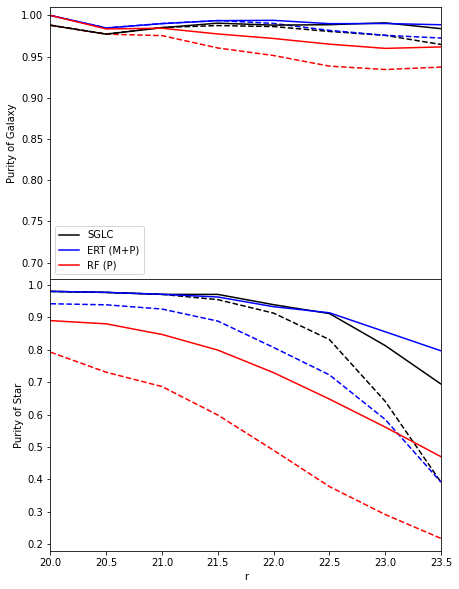

In [15]:
fig = plt.figure(figsize=(7,10))
plt.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


# Galaxy Purity

#plt.figure(figsize =(7,4))

ax1.plot(hist_bins, pdf_99_g['galaxy_purity'], color='black', linestyle='dashed', linewidth=1.5, markersize=3)
ax1.plot(hist_bins, ert_99_g['galaxy_purity'], color='blue' , linestyle='dashed', linewidth=1.5, markersize=3)
ax1.plot(hist_bins, rf_99_g['galaxy_purity'],  color='red', linestyle='dashed', linewidth=1.5, markersize=3) # marker='^'

ax1.plot(hist_bins, pdf_95_g['galaxy_purity'], color='black', linewidth=1.5, markersize=3,label='SGLC')
ax1.plot(hist_bins, ert_95_g['galaxy_purity'], color='blue' , linewidth=1.5, markersize=3,label='ERT (M+P)')
ax1.plot(hist_bins, rf_95_g['galaxy_purity'],  color='red', linewidth=1.5, markersize=3,label='RF (P)') 


ax1.set_ylabel('Purity of Galaxy')
ax1.set_xlabel('r')

ax1.set_xlim(20,23.5)
ax1.axes.get_xaxis().set_ticks([])


#plt.xlabel('Mag Auto')
#plt.ylabel('Galaxy Purity')
#plt.ylim(0.7,1)
#plt.legend()
#plt.savefig('./bins_galaxy_purity.pdf', bbox_inches='tight')
#plt.show()
#plt.close()

ax1.set_ylabel('Purity of Galaxy')
ax1.set_xlabel('r')
ax1.set_ylim(0.68,1.01)
ax1.axes.get_xaxis().set_ticks([])
ax1.legend()





# Star Purity

#plt.figure(figsize =(7,4))

ax2.plot(hist_bins, pdf_99_s['star_purity'], color='black', linestyle='dashed', linewidth=1.5, markersize=3)
ax2.plot(hist_bins, ert_99_s['star_purity'], color='blue' , linestyle='dashed', linewidth=1.5, markersize=3)
ax2.plot(hist_bins, rf_99_s['star_purity'],  color='red', linestyle='dashed', linewidth=1.5, markersize=3) # marker='^'

ax2.plot(hist_bins, pdf_95_s['star_purity'], color='black', linewidth=1.5, markersize=3,label='SGLC')
ax2.plot(hist_bins, ert_95_s['star_purity'], color='blue' , linewidth=1.5, markersize=3,label='ERT (M+P)')
ax2.plot(hist_bins, rf_95_s['star_purity'],  color='red', linewidth=1.5, markersize=3,label='RF (P)') 


ax2.set_ylabel('Purity of Star')
ax2.set_xlabel('r')
ax2.set_xlim(20,23.5)
#ax2.set_ylim(0.7,1)

#plt.savefig('./bins_comp_purity.pdf', bbox_inches='tight')
plt.show()
plt.close()